Weather Impact on Air Quality Level in London.

Importing the packages and librery.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Importing the data (".csv") files.


In [2]:
laqd = pd.read_csv("London_Air_Quality_2023.csv")
lwd = pd.read_csv('london_weather_data_1979_to_2023.csv')



In [3]:
print(laqd.head())
print(lwd.head())

   Unnamed: 0                       Date    City     CO  NO2  SO2    O3  \
0           0  2023-01-01 00:00:00+00:00  London  125.0  6.1  2.2  67.0   
1           1  2023-01-01 01:00:00+00:00  London  132.0  7.8  1.9  68.0   
2           2  2023-01-01 02:00:00+00:00  London  134.0  5.6  2.1  68.0   
3           3  2023-01-01 03:00:00+00:00  London  130.0  4.9  2.0  70.0   
4           4  2023-01-01 04:00:00+00:00  London  131.0  5.6  2.2  70.0   

   PM2.5  PM10        AQI  
0    5.6  10.4  26.800001  
1    5.5   8.7  27.200000  
2    5.6  12.4  27.200000  
3    5.8  13.2  28.000000  
4    5.8  15.0  28.000000  
       DATE    TX  Q_TX    TN  Q_TN    TG  Q_TG    SS  Q_SS   SD  ...   RR  \
0  19790101  23.0     0 -75.0     0 -41.0     0  70.0     0  9.0  ...  4.0   
1  19790102  16.0     0 -75.0     0 -26.0     0  17.0     0  8.0  ...  0.0   
2  19790103  13.0     0 -72.0     0 -28.0     0   0.0     0  4.0  ...  0.0   
3  19790104  -3.0     0 -65.0     0 -26.0     0   0.0     0  2.0  ...

In [4]:
# import pandas as pd
# df = pd.read_csv("London_Air_Quality_2023.csv")
# df['date'] = pd.to_datetime(df['Date'])

# # Extract year, month, and day into separate columns
# df['year'] = df['date'].dt.year
# df['month'] = df['date'].dt.month
# df['day'] = df['date'].dt.day
# print(df['day'])
# print(df)

In [5]:
# import pandas as pd

# # Load the CSV file
# df = pd.read_csv("London_Air_Quality_2023.csv")

# # Convert Date column to datetime
# df['Date'] = pd.to_datetime(df['Date'])

# # Extract only the date part (no hour)
# df['day'] = df['Date'].dt.date
# print(df['day'])
# # Group by day and calculate the mean for all numeric columns
# daily_avg = df.groupby('day').mean(numeric_only=True).reset_index()

# # (Optional) Save the result
# # daily_avg.to_csv("London_Air_Quality_2023_daily_avg.csv", index=False)

# # Show the first few rows
# print(daily_avg.head(10))


In [6]:
# import pandas as pd

# # Load the CSV file
# df = pd.read_csv("London_Air_Quality_2023.csv")

# # Convert Date column to datetime
# df['Date'] = pd.to_datetime(df['Date'])

# # Extract only the date part (no hour)
# df['day'] = df['Date'].dt.date

# # Select only desired columns
# cols_to_avg = ['CO', 'PM2.5']  # add 'CO2' if your dataset has it

# # Group by day and calculate mean only for selected columns
# daily_avg = df.groupby('day')[cols_to_avg].mean().reset_index()

# # Save to a new file (or overwrite existing one)
# # daily_avg.to_csv("London_Air_Quality_2023_daily_avg.csv", index=False)

# print(daily_avg.head())


In [7]:
# df = df.drop(columns=['City', 'AQI'])
# df
# df.drop(columns=['City', 'AQI'], inplace=True)


Cleaning the air quality data. 

In [8]:
#top and button data.
print(laqd.head())
print(laqd.tail())

   Unnamed: 0                       Date    City     CO  NO2  SO2    O3  \
0           0  2023-01-01 00:00:00+00:00  London  125.0  6.1  2.2  67.0   
1           1  2023-01-01 01:00:00+00:00  London  132.0  7.8  1.9  68.0   
2           2  2023-01-01 02:00:00+00:00  London  134.0  5.6  2.1  68.0   
3           3  2023-01-01 03:00:00+00:00  London  130.0  4.9  2.0  70.0   
4           4  2023-01-01 04:00:00+00:00  London  131.0  5.6  2.2  70.0   

   PM2.5  PM10        AQI  
0    5.6  10.4  26.800001  
1    5.5   8.7  27.200000  
2    5.6  12.4  27.200000  
3    5.8  13.2  28.000000  
4    5.8  15.0  28.000000  
      Unnamed: 0                       Date    City     CO   NO2  SO2    O3  \
8755        8755  2023-12-31 19:00:00+00:00  London  185.0   9.8  2.0  56.0   
8756        8756  2023-12-31 20:00:00+00:00  London  189.0  10.6  2.2  57.0   
8757        8757  2023-12-31 21:00:00+00:00  London  184.0   9.7  2.5  61.0   
8758        8758  2023-12-31 22:00:00+00:00  London  182.0   9.0 

In [9]:
#describing the air quality data.
laqd.describe()

,Unnamed: 0,CO,NO2,SO2,O3,PM2.5,PM10,AQI
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,4379.500000,201.765868,19.103025,2.978425,48.871119,8.832329,13.162500,24.793335
std,2528.938512,88.892292,13.008933,1.943444,23.074754,5.942160,7.665786,9.893137
min,0.000000,88.000000,3.400000,0.700000,0.000000,1.500000,2.400000,8.783333
25%,2189.750000,149.000000,9.700000,1.800000,34.000000,5.200000,8.400000,18.800000
50%,4379.500000,175.000000,15.000000,2.500000,51.000000,6.900000,11.000000,23.199999
75%,6569.250000,222.000000,24.500000,3.600000,64.000000,10.200000,15.600000,28.000000
max,8759.000000,1028.000000,86.100000,21.600000,155.000000,56.300000,77.200000,69.886665


In [10]:
#checking the is there any null value is exist or not.
laqd.isnull()

,Unnamed: 0,Date,City,CO,NO2,SO2,O3,PM2.5,PM10,AQI
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
8755,False,False,False,False,False,False,False,False,False,False
8756,False,False,False,False,False,False,False,False,False,False
8757,False,False,False,False,False,False,False,False,False,False
8758,False,False,False,False,False,False,False,False,False,False


In [11]:
laqd.isna().sum() 

Unnamed: 0    0
Date          0
City          0
CO            0
NO2           0
SO2           0
O3            0
PM2.5         0
PM10          0
AQI           0
dtype: int64

In [12]:
laqd.isnull().values.any()
laqd.isnull().sum()

Unnamed: 0    0
Date          0
City          0
CO            0
NO2           0
SO2           0
O3            0
PM2.5         0
PM10          0
AQI           0
dtype: int64

In [13]:
laqd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  8760 non-null   int64  
 1   Date        8760 non-null   object 
 2   City        8760 non-null   object 
 3   CO          8760 non-null   float64
 4   NO2         8760 non-null   float64
 5   SO2         8760 non-null   float64
 6   O3          8760 non-null   float64
 7   PM2.5       8760 non-null   float64
 8   PM10        8760 non-null   float64
 9   AQI         8760 non-null   float64
dtypes: float64(7), int64(1), object(2)
memory usage: 684.5+ KB


In [14]:
laqd = laqd.drop(columns=['City'])
print(laqd)
laqd.head()
# df = df.drop(columns=['City', 'AQI'])
# df
# df.drop(columns=['City', 'AQI'], inplace=True)



      Unnamed: 0                       Date     CO   NO2  SO2    O3  PM2.5  \
0              0  2023-01-01 00:00:00+00:00  125.0   6.1  2.2  67.0    5.6   
1              1  2023-01-01 01:00:00+00:00  132.0   7.8  1.9  68.0    5.5   
2              2  2023-01-01 02:00:00+00:00  134.0   5.6  2.1  68.0    5.6   
3              3  2023-01-01 03:00:00+00:00  130.0   4.9  2.0  70.0    5.8   
4              4  2023-01-01 04:00:00+00:00  131.0   5.6  2.2  70.0    5.8   
...          ...                        ...    ...   ...  ...   ...    ...   
8755        8755  2023-12-31 19:00:00+00:00  185.0   9.8  2.0  56.0    4.9   
8756        8756  2023-12-31 20:00:00+00:00  189.0  10.6  2.2  57.0    5.2   
8757        8757  2023-12-31 21:00:00+00:00  184.0   9.7  2.5  61.0    5.3   
8758        8758  2023-12-31 22:00:00+00:00  182.0   9.0  2.3  63.0    5.1   
8759        8759  2023-12-31 23:00:00+00:00  182.0   8.1  1.8  63.0    5.0   

      PM10        AQI  
0     10.4  26.800001  
1      8.7  27.

,Unnamed: 0,Date,CO,NO2,SO2,O3,PM2.5,PM10,AQI
0,0,2023-01-01 00:00:00+00:00,125.0,6.1,2.2,67.0,5.6,10.4,26.800001
1,1,2023-01-01 01:00:00+00:00,132.0,7.8,1.9,68.0,5.5,8.7,27.200000
2,2,2023-01-01 02:00:00+00:00,134.0,5.6,2.1,68.0,5.6,12.4,27.200000
3,3,2023-01-01 03:00:00+00:00,130.0,4.9,2.0,70.0,5.8,13.2,28.000000
4,4,2023-01-01 04:00:00+00:00,131.0,5.6,2.2,70.0,5.8,15.0,28.000000


In [15]:
laqd["date"] = pd.to_datetime(laqd['Date'])
laqd['DATE'] = laqd['date'].dt.date
cols_Avg = ['CO','NO2','SO2','O3','PM2.5','PM10','AQI']
laqd = laqd.groupby('DATE')[cols_Avg].mean().reset_index()
laqd['DATE'] = pd.to_datetime(laqd['DATE'])
print(laqd.head())
print(laqd.tail())

        DATE          CO        NO2       SO2         O3     PM2.5       PM10  \
0 2023-01-01  152.416667  12.979167  3.462500  60.541667  7.762500  14.420833   
1 2023-01-02  201.375000  29.929167  4.854167  32.375000  9.500000  12.575000   
2 2023-01-03  170.541667  21.458333  3.400000  45.625000  7.137500  10.566667   
3 2023-01-04  121.791667  11.741667  3.041667  60.000000  6.483333  10.854167   
4 2023-01-05  137.625000  17.025000  3.629167  51.000000  7.900000  13.408333   

         AQI  
0  24.256944  
1  20.005695  
2  23.328264  
3  24.000000  
4  21.185764  
          DATE          CO        NO2       SO2         O3     PM2.5  \
360 2023-12-27  171.833333  13.675000  3.408333  53.875000  7.045833   
361 2023-12-28  158.625000   8.920833  3.375000  70.375000  9.454167   
362 2023-12-29  166.833333  14.237500  3.958333  56.708333  5.550000   
363 2023-12-30  163.666667  12.733333  3.604167  57.125000  5.350000   
364 2023-12-31  173.791667   9.012500  1.850000  64.833333  4.4

In [16]:
laqd

,DATE,CO,NO2,SO2,O3,PM2.5,PM10,AQI
0,2023-01-01,152.416667,12.979167,3.462500,60.541667,7.762500,14.420833,24.256944
1,2023-01-02,201.375000,29.929167,4.854167,32.375000,9.500000,12.575000,20.005695
2,2023-01-03,170.541667,21.458333,3.400000,45.625000,7.137500,10.566667,23.328264
3,2023-01-04,121.791667,11.741667,3.041667,60.000000,6.483333,10.854167,24.000000
4,2023-01-05,137.625000,17.025000,3.629167,51.000000,7.900000,13.408333,21.185764
...,...,...,...,...,...,...,...,...
360,2023-12-27,171.833333,13.675000,3.408333,53.875000,7.045833,10.758333,23.365625
361,2023-12-28,158.625000,8.920833,3.375000,70.375000,9.454167,17.491667,28.150000
362,2023-12-29,166.833333,14.237500,3.958333,56.708333,5.550000,10.050000,22.683333
363,2023-12-30,163.666667,12.733333,3.604167,57.125000,5.350000,9.300000,22.850000


Cleaning the London Weather Data

Dataset Overview

This dataset provides daily weather observations from Heathrow, United Kingdom (STAID: 1860), spanning the period from 1979 to 2023. The data is sourced from the European Climate Assessment & Dataset (ECA&D) and includes multiple weather parameters such as temperature, precipitation, sunshine, and more.


    DATE: Date in YYYYMMDD format.
    TX: Daily maximum temperature in 0.1°C.
    TN: Daily minimum temperature in 0.1°C.
    TG: Daily mean temperature in 0.1°C.
    SS: Daily sunshine duration in 0.1 hours.
    SD: Daily snow depth in 1 cm.
    RR: Daily precipitation amount in 0.1 mm.
    QQ: Daily global radiation in W/m².
    PP: Daily sea level pressure in 0.1 hPa.
    HU: Daily relative humidity in %.
    CC: Daily cloud cover in oktas.

Each parameter includes an associated quality code:

    0: Valid data
    1: Suspect data
    9: Missing data


In [17]:
print(lwd.head())
print(lwd.tail())

       DATE    TX  Q_TX    TN  Q_TN    TG  Q_TG    SS  Q_SS   SD  ...   RR  \
0  19790101  23.0     0 -75.0     0 -41.0     0  70.0     0  9.0  ...  4.0   
1  19790102  16.0     0 -75.0     0 -26.0     0  17.0     0  8.0  ...  0.0   
2  19790103  13.0     0 -72.0     0 -28.0     0   0.0     0  4.0  ...  0.0   
3  19790104  -3.0     0 -65.0     0 -26.0     0   0.0     0  2.0  ...  0.0   
4  19790105  56.0     0 -14.0     0  -8.0     0  20.0     0  1.0  ...  0.0   

   Q_RR    QQ  Q_QQ       PP  Q_PP    HU  Q_HU   CC  Q_CC  
0     0  52.0     0  10190.0     0  83.0     0  2.0     0  
1     0  27.0     0  10253.0     0  76.0     0  6.0     0  
2     0  13.0     0  10205.0     0  86.0     0  5.0     0  
3     0  13.0     0  10084.0     0  68.0     0  8.0     0  
4     0  29.0     0  10225.0     0  73.0     0  6.0     0  

[5 rows x 21 columns]
           DATE     TX  Q_TX    TN  Q_TN     TG  Q_TG   SS  Q_SS   SD  ...  \
16431  20231227  126.0     0  55.0     0   89.0     0  0.0     0  0.0 

In [18]:
lwd.head(25)

,DATE,TX,Q_TX,TN,Q_TN,TG,Q_TG,SS,Q_SS,SD,...,RR,Q_RR,QQ,Q_QQ,PP,Q_PP,HU,Q_HU,CC,Q_CC
0,19790101,23.0,0,-75.0,0,-41.0,0,70.0,0,9.0,...,4.0,0,52.0,0,10190.0,0,83.0,0,2.0,0
1,19790102,16.0,0,-75.0,0,-26.0,0,17.0,0,8.0,...,0.0,0,27.0,0,10253.0,0,76.0,0,6.0,0
2,19790103,13.0,0,-72.0,0,-28.0,0,0.0,0,4.0,...,0.0,0,13.0,0,10205.0,0,86.0,0,5.0,0
3,19790104,-3.0,0,-65.0,0,-26.0,0,0.0,0,2.0,...,0.0,0,13.0,0,10084.0,0,68.0,0,8.0,0
4,19790105,56.0,0,-14.0,0,-8.0,0,20.0,0,1.0,...,0.0,0,29.0,0,10225.0,0,73.0,0,6.0,0
5,19790106,83.0,0,-66.0,0,-5.0,0,38.0,0,1.0,...,7.0,0,39.0,0,10278.0,0,84.0,0,5.0,0
6,19790107,85.0,0,-53.0,0,15.0,0,0.0,0,0.0,...,52.0,0,13.0,0,10252.0,0,93.0,0,8.0,0
7,19790108,58.0,1,53.0,0,69.0,1,1.0,0,0.0,...,8.0,0,15.0,0,10187.0,0,95.0,0,8.0,0
8,19790109,52.0,0,16.0,0,37.0,0,58.0,0,0.0,...,72.0,0,50.0,0,10117.0,0,86.0,0,4.0,0
9,19790110,49.0,0,14.0,0,33.0,0,19.0,0,0.0,...,21.0,0,30.0,0,9870.0,0,87.0,0,7.0,0


In [19]:
lwd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16436 entries, 0 to 16435
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    16436 non-null  int64  
 1   TX      16436 non-null  float64
 2   Q_TX    16436 non-null  int64  
 3   TN      16436 non-null  float64
 4   Q_TN    16436 non-null  int64  
 5   TG      16407 non-null  float64
 6   Q_TG    16436 non-null  int64  
 7   SS      16436 non-null  float64
 8   Q_SS    16436 non-null  int64  
 9   SD      15361 non-null  float64
 10  Q_SD    16436 non-null  int64  
 11  RR      16436 non-null  float64
 12  Q_RR    16436 non-null  int64  
 13  QQ      16411 non-null  float64
 14  Q_QQ    16436 non-null  int64  
 15  PP      16432 non-null  float64
 16  Q_PP    16436 non-null  int64  
 17  HU      16379 non-null  float64
 18  Q_HU    16436 non-null  int64  
 19  CC      16418 non-null  float64
 20  Q_CC    16436 non-null  int64  
dtypes: float64(10), int64(11)
memory us

In [20]:
lwd = lwd[(lwd['DATE'] >= 20230101) & (lwd['DATE'] <= 20231231)]
lwd = lwd.reset_index(drop=True)
lwd['DATE'] = pd.to_datetime(lwd['DATE'], format='%Y%m%d')
print(lwd.head(20))

         DATE     TX  Q_TX     TN  Q_TN     TG  Q_TG    SS  Q_SS   SD  ...  \
0  2023-01-01   93.0     1  100.0     1  112.0     1   0.0     0  0.0  ...   
1  2023-01-02  134.0     0   52.0     0   72.0     0  52.0     0  0.0  ...   
2  2023-01-03  139.0     0   21.0     0   78.0     0   0.0     0  0.0  ...   
3  2023-01-04  135.0     0   92.0     0  116.0     0   4.0     0  0.0  ...   
4  2023-01-05  127.0     0   89.0     0  112.0     0   4.0     0  0.0  ...   
5  2023-01-06  114.0     0   63.0     0   95.0     0  22.0     0  0.0  ...   
6  2023-01-07   95.0     0   67.0     0   91.0     0   0.0     0  0.0  ...   
7  2023-01-08   96.0     0   65.0     0   80.0     0   2.0     0  0.0  ...   
8  2023-01-09  130.0     0   44.0     0   70.0     0  24.0     0  0.0  ...   
9  2023-01-10  122.0     0   39.0     0   84.0     0   0.0     0  0.0  ...   
10 2023-01-11  127.0     0   68.0     0   95.0     0  31.0     0  0.0  ...   
11 2023-01-12  115.0     0   72.0     0   99.0     0   1.0     0

In [21]:
lwd['SD']

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
360    0.0
361    0.0
362    0.0
363    0.0
364    0.0
Name: SD, Length: 365, dtype: float64

In [22]:
lwd = lwd.drop(columns=['TX','Q_TX','TN','Q_TN','Q_TG','Q_SS','Q_SD','Q_RR','Q_QQ','PP','Q_PP','Q_HU','Q_CC'])
print(lwd)


          DATE     TG    SS   SD    RR    QQ    HU   CC
0   2023-01-01  112.0   0.0  0.0  46.0  21.0  81.0  7.0
1   2023-01-02   72.0  52.0  0.0   4.0  44.0  86.0  3.0
2   2023-01-03   78.0   0.0  0.0  30.0   9.0  93.0  7.0
3   2023-01-04  116.0   4.0  0.0   2.0  17.0  82.0  6.0
4   2023-01-05  112.0   4.0  0.0  24.0  28.0  82.0  8.0
..         ...    ...   ...  ...   ...   ...   ...  ...
360 2023-12-27   89.0   0.0  0.0  46.0  12.0  89.0  8.0
361 2023-12-28  112.0   2.0  0.0  48.0  15.0  81.0  7.0
362 2023-12-29  106.0   7.0  0.0   0.0  20.0  78.0  6.0
363 2023-12-30   89.0   0.0  0.0  56.0  12.0  87.0  7.0
364 2023-12-31   82.0   5.0  0.0  16.0  18.0  85.0  7.0

[365 rows x 8 columns]


In [23]:
# lwd = pd.read_csv('london_weather_data_1979_to_2023.csv')
# lwd = lwd[(lwd['DATE'] >= 20230101) & (lwd['DATE'] <= 20231231)]
# lwd = lwd.reset_index(drop=True)
# print(lwd.head(10))
# lwd = lwd.drop(columns=['TX','Q_TX','TN','Q_TN','Q_TG','Q_SS','Q_SD','Q_RR','Q_QQ','PP','Q_PP','Q_HU','Q_CC'])
print(lwd.head(10))

        DATE     TG    SS   SD    RR    QQ    HU   CC
0 2023-01-01  112.0   0.0  0.0  46.0  21.0  81.0  7.0
1 2023-01-02   72.0  52.0  0.0   4.0  44.0  86.0  3.0
2 2023-01-03   78.0   0.0  0.0  30.0   9.0  93.0  7.0
3 2023-01-04  116.0   4.0  0.0   2.0  17.0  82.0  6.0
4 2023-01-05  112.0   4.0  0.0  24.0  28.0  82.0  8.0
5 2023-01-06   95.0  22.0  0.0   6.0  34.0  87.0  4.0
6 2023-01-07   91.0   0.0  0.0  32.0   8.0  84.0  7.0
7 2023-01-08   80.0   2.0  0.0  72.0  14.0  87.0  6.0
8 2023-01-09   70.0  24.0  0.0  20.0  38.0  80.0  4.0
9 2023-01-10   84.0   0.0  0.0  36.0  10.0  89.0  7.0


London Weather data column's name changing for better understanding.

    Daily mean temperature (mean_temp_centrigrade) in 0.1°C to °C.
    SS: Daily sunshine duration (sunshine_hours) in 0.1 hours to hours.
    RR: Daily precipitation amount (total_rainfall) in 0.1 mm to mm.


In [24]:
#Renamening the columns names
# lwd.rename(columns={'BIKAS':'TX'},inplace=True)
lwd.rename(columns={'TG':'mean_temp_centrigrade','SS':'sunshine_hours','SD':'snow_depth_cm','RR':'total_rainfall_mm','QQ':'global_rad_WperM2','HU':'humidity_percent','CC':'cloud_cover_octas'}, inplace=True)
lwd['mean_temp_centrigrade'] = lwd['mean_temp_centrigrade'] * 0.1
lwd['sunshine_hours'] = lwd['sunshine_hours'] * 0.1
lwd['total_rainfall_mm'] = lwd['total_rainfall_mm'] * 0.1
print(lwd.head(10))
print(lwd.tail(10))

        DATE  mean_temp_centrigrade  sunshine_hours  snow_depth_cm  \
0 2023-01-01                   11.2             0.0            0.0   
1 2023-01-02                    7.2             5.2            0.0   
2 2023-01-03                    7.8             0.0            0.0   
3 2023-01-04                   11.6             0.4            0.0   
4 2023-01-05                   11.2             0.4            0.0   
5 2023-01-06                    9.5             2.2            0.0   
6 2023-01-07                    9.1             0.0            0.0   
7 2023-01-08                    8.0             0.2            0.0   
8 2023-01-09                    7.0             2.4            0.0   
9 2023-01-10                    8.4             0.0            0.0   

   total_rainfall_mm  global_rad_WperM2  humidity_percent  cloud_cover_octas  
0                4.6               21.0              81.0                7.0  
1                0.4               44.0              86.0              

In [25]:
lwd.describe()

,DATE,mean_temp_centrigrade,sunshine_hours,snow_depth_cm,total_rainfall_mm,global_rad_WperM2,humidity_percent,cloud_cover_octas
count,365,365.000000,365.000000,365.0,365.000000,365.000000,365.000000,365.000000
mean,2023-07-02 00:00:00,12.729589,4.124658,0.0,2.087671,121.884932,76.747945,5.295890
min,2023-01-01 00:00:00,-2.100000,0.000000,0.0,0.000000,0.000000,48.000000,0.000000
25%,2023-04-02 00:00:00,8.700000,0.700000,0.0,0.000000,45.000000,70.000000,4.000000
50%,2023-07-02 00:00:00,12.200000,3.500000,0.0,0.000000,99.000000,78.000000,6.000000
75%,2023-10-01 00:00:00,17.400000,6.800000,0.0,2.400000,196.000000,84.000000,7.000000
max,2023-12-31 00:00:00,25.900000,14.200000,0.0,36.000000,339.000000,97.000000,8.000000
std,NaN,5.730979,3.689240,0.0,4.228291,89.670324,9.914582,2.261748


In [26]:
lwd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   DATE                   365 non-null    datetime64[ns]
 1   mean_temp_centrigrade  365 non-null    float64       
 2   sunshine_hours         365 non-null    float64       
 3   snow_depth_cm          365 non-null    float64       
 4   total_rainfall_mm      365 non-null    float64       
 5   global_rad_WperM2      365 non-null    float64       
 6   humidity_percent       365 non-null    float64       
 7   cloud_cover_octas      365 non-null    float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 22.9 KB


In [27]:
lwd.isnull()

,DATE,mean_temp_centrigrade,sunshine_hours,snow_depth_cm,total_rainfall_mm,global_rad_WperM2,humidity_percent,cloud_cover_octas
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
360,False,False,False,False,False,False,False,False
361,False,False,False,False,False,False,False,False
362,False,False,False,False,False,False,False,False
363,False,False,False,False,False,False,False,False


In [28]:
lwd.isnull().sum()

DATE                     0
mean_temp_centrigrade    0
sunshine_hours           0
snow_depth_cm            0
total_rainfall_mm        0
global_rad_WperM2        0
humidity_percent         0
cloud_cover_octas        0
dtype: int64

In [29]:
lwd.isnull().values.any()

np.False_

In [30]:
lwd.isna()

,DATE,mean_temp_centrigrade,sunshine_hours,snow_depth_cm,total_rainfall_mm,global_rad_WperM2,humidity_percent,cloud_cover_octas
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
360,False,False,False,False,False,False,False,False
361,False,False,False,False,False,False,False,False
362,False,False,False,False,False,False,False,False
363,False,False,False,False,False,False,False,False


In [31]:
lwd.isna().sum()

DATE                     0
mean_temp_centrigrade    0
sunshine_hours           0
snow_depth_cm            0
total_rainfall_mm        0
global_rad_WperM2        0
humidity_percent         0
cloud_cover_octas        0
dtype: int64

For Data Visulization Merging the Weather and Air Quality data. 

In [32]:
wioaqlil = pd.merge(laqd, lwd, on=['DATE'])
print(wioaqlil.head())

        DATE          CO        NO2       SO2         O3     PM2.5       PM10  \
0 2023-01-01  152.416667  12.979167  3.462500  60.541667  7.762500  14.420833   
1 2023-01-02  201.375000  29.929167  4.854167  32.375000  9.500000  12.575000   
2 2023-01-03  170.541667  21.458333  3.400000  45.625000  7.137500  10.566667   
3 2023-01-04  121.791667  11.741667  3.041667  60.000000  6.483333  10.854167   
4 2023-01-05  137.625000  17.025000  3.629167  51.000000  7.900000  13.408333   

         AQI  mean_temp_centrigrade  sunshine_hours  snow_depth_cm  \
0  24.256944                   11.2             0.0            0.0   
1  20.005695                    7.2             5.2            0.0   
2  23.328264                    7.8             0.0            0.0   
3  24.000000                   11.6             0.4            0.0   
4  21.185764                   11.2             0.4            0.0   

   total_rainfall_mm  global_rad_WperM2  humidity_percent  cloud_cover_octas  
0            

In [33]:
wioaqlil.tail(20)

,DATE,CO,NO2,SO2,O3,PM2.5,PM10,AQI,mean_temp_centrigrade,sunshine_hours,snow_depth_cm,total_rainfall_mm,global_rad_WperM2,humidity_percent,cloud_cover_octas
345,2023-12-12,242.333333,28.891667,4.670833,36.291667,7.241667,10.862500,20.558471,8.9,1.0,0.0,2.6,22.0,94.0,7.0
346,2023-12-13,225.541667,14.741667,3.933333,32.333333,5.191667,7.270833,13.835764,7.9,0.0,0.0,0.6,12.0,89.0,8.0
347,2023-12-14,357.208333,35.270833,4.908333,12.458333,9.537500,13.075000,18.353889,5.5,0.0,0.0,0.6,12.0,91.0,7.0
348,2023-12-15,367.416667,44.754167,5.516667,9.625000,12.483333,19.600000,23.405556,7.2,0.0,0.0,0.0,12.0,82.0,6.0
349,2023-12-16,196.166667,19.854167,2.216667,41.916667,6.795833,8.670833,21.565277,8.5,0.0,0.0,0.0,12.0,90.0,8.0
350,2023-12-17,186.875000,13.420833,2.100000,53.208333,7.416667,10.933333,21.283333,10.7,1.6,0.0,0.0,25.0,80.0,8.0
351,2023-12-18,172.708333,17.108333,2.816667,58.833333,7.270833,11.950000,23.533333,11.1,0.0,0.0,6.2,12.0,82.0,8.0
352,2023-12-19,216.750000,22.283333,4.050000,45.333333,7.225000,10.541667,18.782986,11.4,0.0,0.0,8.4,12.0,92.0,6.0
353,2023-12-20,203.791667,15.854167,3.504167,45.958333,5.575000,9.208333,18.562153,8.2,1.0,0.0,0.0,22.0,85.0,5.0
354,2023-12-21,175.208333,8.895833,3.291667,63.958333,4.404167,7.420833,25.583333,10.8,0.3,0.0,0.6,16.0,73.0,7.0


In [34]:
wioaqlil.describe()

,DATE,CO,NO2,SO2,O3,PM2.5,PM10,AQI,mean_temp_centrigrade,sunshine_hours,snow_depth_cm,total_rainfall_mm,global_rad_WperM2,humidity_percent,cloud_cover_octas
count,365,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.0,365.000000,365.000000,365.000000,365.000000
mean,2023-07-02 00:00:00,201.765868,19.103025,2.978425,48.871119,8.832329,13.162500,24.793335,12.729589,4.124658,0.0,2.087671,121.884932,76.747945,5.295890
min,2023-01-01 00:00:00,111.041667,4.791667,0.991667,2.666667,3.841667,5.345833,12.292708,-2.100000,0.000000,0.0,0.000000,0.000000,48.000000,0.000000
25%,2023-04-02 00:00:00,153.583333,11.658333,1.866667,39.291667,5.804167,9.133333,19.700000,8.700000,0.700000,0.0,0.000000,45.000000,70.000000,4.000000
50%,2023-07-02 00:00:00,179.458333,16.316667,2.720833,50.333333,7.045833,11.166667,22.977083,12.200000,3.500000,0.0,0.000000,99.000000,78.000000,6.000000
75%,2023-10-01 00:00:00,220.541667,24.062500,3.629167,60.708333,9.916667,15.041667,26.750000,17.400000,6.800000,0.0,2.400000,196.000000,84.000000,7.000000
max,2023-12-31 00:00:00,700.458333,62.854167,10.383333,99.583333,34.820833,42.325000,68.581111,25.900000,14.200000,0.0,36.000000,339.000000,97.000000,8.000000
std,NaN,76.264192,10.307672,1.525602,17.797500,5.030534,6.515739,8.692725,5.730979,3.689240,0.0,4.228291,89.670324,9.914582,2.261748


In [35]:
wioaqlil.isna().sum()

DATE                     0
CO                       0
NO2                      0
SO2                      0
O3                       0
PM2.5                    0
PM10                     0
AQI                      0
mean_temp_centrigrade    0
sunshine_hours           0
snow_depth_cm            0
total_rainfall_mm        0
global_rad_WperM2        0
humidity_percent         0
cloud_cover_octas        0
dtype: int64

Visualization using Matplotlib and Seaborn

<Axes: xlabel='DATE', ylabel='count'>

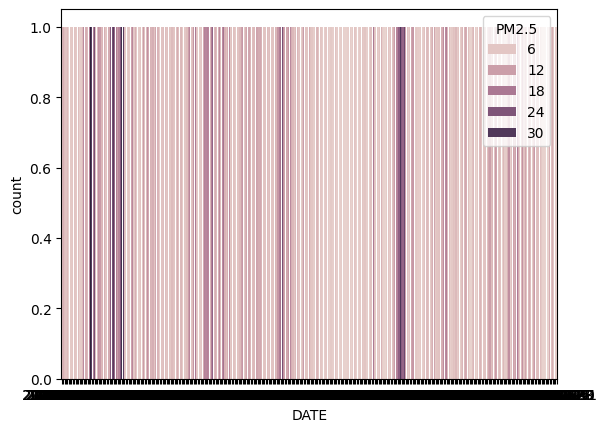

In [36]:
sns.countplot(x='DATE', hue='PM2.5', data= wioaqlil)

In [37]:
sns.histplot(wioaqlil['PM2.5'], bins=3import seaborn as sns
import matplotlib.pyplot as plt

# Ensure DATE is in datetime format
wioaqlil['DATE'] = pd.to_datetime(wioaqlil['DATE'])

sns.scatterplot(x='DATE', y='PM2.5', data=wioaqlil)
plt.title('PM2.5 Scatter Plot Over Time')
plt.xlabel('Date')
plt.ylabel('PM2.5 Concentration')
plt.xticks(rotation=45)
plt.show()
0, kde=True)
plt.title('Distribution of PM2.5 Levels')
plt.xlabel('PM2.5')
plt.ylabel('Frequency')
plt.show()


SyntaxError: invalid decimal literal (1629986455.py, line 1)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure DATE is in datetime format
wioaqlil['DATE'] = pd.to_datetime(wioaqlil['DATE'])

sns.scatterplot(x='DATE', y='PM2.5', data=wioaqlil)
plt.title('PM2.5 Scatter Plot Over Time')
plt.xlabel('Date')
plt.ylabel('PM2.5 Concentration')
plt.xticks(rotation=45)
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure DATE is datetime
wioaqlil['DATE'] = pd.to_datetime(wioaqlil['DATE'])

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='DATE',
    y='PM2.5',
    hue='mean_temp_centrigrade',          # Color by temperature
    palette='coolwarm',  # Blue=cool, red=warm
    data=wioaqlil
)
plt.title('PM2.5 Levels Over Time (Colored by Temperature)')
plt.xlabel('Date')
plt.ylabel('PM2.5 Concentration')
plt.xticks(rotation=45)
plt.legend(title='Temperature')
plt.show()


In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='DATE',
    y='PM2.5',
    hue='mean_temp_centrigrade',
    size='mean_temp_centrigrade',
    sizes=(20, 200),
    palette='coolwarm',
    data=wioaqlil,
    alpha=0.7
)
plt.title('PM2.5 vs. Date with Temperature as Color & Size')
plt.xlabel('Date')
plt.ylabel('PM2.5 Concentration')
plt.xticks(rotation=45)
plt.legend(title='Temperature')
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

wioaqlil['DATE'] = pd.to_datetime(wioaqlil['DATE'])

plt.figure(figsize=(12, 8))

# Reshape data from wide to long format
pollutants = ['PM2.5', 'PM10', 'NO2']
wio_melted = wioaqlil.melt(id_vars=['DATE', 'mean_temp_centrigrade'], value_vars=pollutants,
                           var_name='Pollutant', value_name='Concentration')

sns.scatterplot(
    x='DATE',
    y='Concentration',
    hue='mean_temp_centrigrade',
    style='Pollutant',
    palette='coolwarm',
    data=wio_melted,
    alpha=0.8
)
plt.title('Air Pollutant Concentrations Over Time (Colored by Temperature)')
plt.xlabel('Date')
plt.ylabel('Concentration (µg/m³)')
plt.xticks(rotation=45)
plt.legend(title='Temperature / Pollutant', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [ ]:
sns.relplot(
    x='DATE',
    y='Concentration',
    hue='mean_temp_centrigrade',
    col='Pollutant',
    kind='scatter',
    palette='coolwarm',
    data=wio_melted,
    col_wrap=1,
    height=4,
    aspect=2
)
plt.show()


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare
wioaqlil = wioaqlil.copy()
wioaqlil['DATE'] = pd.to_datetime(wioaqlil['DATE'])
wioaqlil['TEMP'] = pd.to_numeric(wioaqlil['mean_temp_centrigrade'], errors='coerce')

pollutants = ['PM2.5','PM10','NO2','CO','O3','SO2','AQI']
wio_melted = wioaqlil.melt(
    id_vars=['DATE','TEMP'],
    value_vars=pollutants,
    var_name='Pollutant',
    value_name='Concentration'
)

plt.figure(figsize=(14,7))
sns.scatterplot(
    data=wio_melted,
    x='DATE',
    y='Concentration',
    hue='TEMP',             # color by temperature
    style='Pollutant',      # different marker per pollutant
    palette='coolwarm',
    alpha=0.7,
    s=60
)
plt.title('Pollutant Concentrations Over Time (colored by TEMP)')
plt.xlabel('Date')
plt.ylabel('Concentration (units vary)')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

wioaqlil = wioaqlil.copy()
wioaqlil['DATE'] = pd.to_datetime(wioaqlil['DATE'])
wioaqlil['TEMP'] = pd.to_numeric(wioaqlil['mean_temp_centrigrade'], errors='coerce')

pollutants = ['PM2.5','PM10','NO2','CO','O3','SO2','AQI']
wio_melted = wioaqlil.melt(
    id_vars=['DATE','TEMP'],
    value_vars=pollutants,
    var_name='Pollutant',
    value_name='Concentration'
)

# Facet grid: one plot per pollutant
g = sns.relplot(
    data=wio_melted,
    x='DATE',
    y='Concentration',
    col='Pollutant',
    kind='scatter',
    hue='TEMP',
    palette='coolwarm',
    col_wrap=3,        # 3 columns per row; adjust as needed
    height=3.5,
    aspect=1.6,
    alpha=0.7,
    legend='brief'
)

# Improve layout & rotate x labels for all facets
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)
g.set_axis_labels("Date", "Concentration")
g.fig.suptitle('Pollutant Concentrations Over Time (colored by TEMP)', y=1.02)
plt.tight_layout()
plt.show()


In [ ]:
from statsmodels.nonparametric.smoothers_lowess import lowess
import numpy as np

In [ ]:
from statsmodels.nonparametric.smoothers_lowess import lowess
import numpy as np

# Use the melted dataframe from above
g = sns.FacetGrid(wio_melted, col='Pollutant', col_wrap=3, height=3.5, aspect=1.6)
g.map_dataframe(sns.scatterplot, 'DATE', 'Concentration', 'mean_temp_centrigrade', palette='coolwarm', alpha=0.6)

# compute and plot LOWESS trend in each facet
for ax, pollutant in zip(g.axes.flat, g.col_names):
    sub = wio_melted[wio_melted['Pollutant'] == pollutant].dropna(subset=['Concentration','DATE'])
    if len(sub) > 5:
        # lowess expects numeric x; convert dates to numeric ordinal
        x_ord = sub['DATE'].map(pd.Timestamp.toordinal)
        z = lowess(sub['Concentration'].values, x_ord.values, frac=0.1)  # frac controls smoothness
        # convert x back to datetime for plotting
        x_dates = [pd.to_datetime(int(x)) for x in z[:,0]]
        ax.plot(x_dates, z[:,1], linewidth=2)
    ax.set_title(pollutant)
    for label in ax.get_xticklabels():
        label.set_rotation(45)
g.set_axis_labels("Date", "Concentration")
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare data
wioaqlil = wioaqlil.copy()
wioaqlil['DATE'] = pd.to_datetime(wioaqlil['DATE'])
wioaqlil['TEMP'] = pd.to_numeric(wioaqlil['mean_temp_centrigrade'], errors='coerce')

# Convert date to month period
wioaqlil['Month'] = wioaqlil['DATE'].dt.to_period('M').dt.to_timestamp()

# List of pollutants
pollutants = ['PM2.5','PM10','NO2','CO','O3','SO2','AQI']

# Group by Month and compute average
monthly = wioaqlil.groupby('Month')[pollutants + ['TEMP']].mean().reset_index()

# Melt data for plotting
wio_melted = monthly.melt(
    id_vars=['Month','TEMP'],
    value_vars=pollutants,
    var_name='Pollutant',
    value_name='Concentration'
)

# Plot
plt.figure(figsize=(14,7))
sns.scatterplot(
    data=wio_melted,
    x='Month',
    y='Concentration',
    hue='TEMP',
    style='Pollutant',
    palette='coolwarm',
    alpha=0.8,
    s=80
)
plt.title('Monthly Pollutant Concentrations (colored by Mean Temperature)')
plt.xlabel('Month')
plt.ylabel('Mean Concentration (units vary)')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare data
wioaqlil = wioaqlil.copy()
wioaqlil['DATE'] = pd.to_datetime(wioaqlil['DATE'])
wioaqlil['TEMP'] = pd.to_numeric(wioaqlil['mean_temp_centrigrade'], errors='coerce')

# Convert date to month period
wioaqlil['Month'] = wioaqlil['DATE'].dt.to_period('M').dt.to_timestamp()

# List of pollutants
pollutants = ['PM2.5','PM10','NO2','CO','O3','SO2','AQI']

# Group by Month and compute average
monthly = wioaqlil.groupby('Month')[pollutants + ['TEMP']].mean().reset_index()

# Melt data for plotting
wio_melted = monthly.melt(
    id_vars=['Month','TEMP'],
    value_vars=pollutants,
    var_name='Pollutant',
    value_name='Concentration'
)

# Plot
plt.figure(figsize=(14,7))
sns.scatterplot(
    data=wio_melted,
    x='Month',
    y='Concentration',
    hue='TEMP',
    style='Pollutant',
    palette='coolwarm',
    alpha=0.8,
    s=80
)
plt.title('Monthly Pollutant Concentrations (colored by Mean Temperature)')
plt.xlabel('Month')
plt.ylabel('Mean Concentration (units vary)')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

wioaqlil['DATE'] = pd.to_datetime(wioaqlil['DATE'])
wioaqlil['TEMP'] = pd.to_numeric(wioaqlil['mean_temp_centrigrade'], errors='coerce')

pollutants = ['PM2.5','PM10','NO2','CO','O3','SO2','AQI']
wioaqlil['Month'] = wioaqlil['DATE'].dt.to_period('M').dt.to_timestamp()
monthly = wioaqlil.groupby('Month')[pollutants + ['TEMP']].mean().reset_index()

wio_melted = monthly.melt(id_vars=['Month','TEMP'], value_vars=pollutants,
                          var_name='Pollutant', value_name='Concentration')

g = sns.relplot(
    data=wio_melted,
    x='Month',
    y='Concentration',
    col='Pollutant',
    kind='scatter',
    hue='TEMP',
    palette='coolwarm',
    col_wrap=3,
    height=3.5,
    aspect=1.6,
    alpha=0.7
)

for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)
g.set_axis_labels("Month", "Mean Concentration")
g.fig.suptitle('Monthly Pollutant Concentrations (colored by Temperature)', y=1.02)
plt.tight_layout()
plt.show()


In [ ]:
sns.lineplot(
    data=wio_melted,
    x='Month',
    y='Concentration',
    hue='Pollutant'
)


In [ ]:
import requests
import pandas as pd
from io import StringIO  # ✅ use this instead of pd.compat
from datetime import datetime

def get_weather_data(year):
    # Define base URL and parameters
    city = "london"
    api_key = "WEAGHA5EN5YD8PCZ2NLXGT92Z"
    base_url = "https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/"
    
    # Start and end of the given year
    start_date = f"{year}-01-01"
    end_date = f"{year}-12-31"
    
    # Build full URL
    url = (
        f"{base_url}{city}/{start_date}/{end_date}"
        f"?unitGroup=us&include=days&key={api_key}&contentType=csv"
    )

    print(f"Fetching data for {year}...\n")
    
    # Make request
    response = requests.get(url)
    
    # Check if successful
    if response.status_code != 200:
        print("Error fetching data:", response.text)
        return None

    # ✅ Convert CSV response text to a DataFrame using StringIO
    data = pd.read_csv(StringIO(response.text))
    
    return data


def main():
    # Ask user for year input
    year_input = input("Enter a year (e.g., 2023): ").strip()
    
    # Validate input
    if not year_input.isdigit() or len(year_input) != 4:
        print("❌ Please enter a valid 4-digit year.")
        return
    
    # Fetch weather data
    df = get_weather_data(year_input)
    
    if df is not None:
        print(f"\n✅ Weather data for London, {year_input} — {len(df)} days found.\n")
        print(df.head())  # Show first few rows
        
        # Optionally save to CSV
        save_option = input("\nDo you want to save the full data to a CSV file? (y/n): ").lower()
        if save_option == "y":
            filename = f"london_weather_{year_input}.csv"
            df.to_csv(filename, index=False)
            print(f"💾 Data saved as {filename}")
    else:
        print("Failed to retrieve data.")


if __name__ == "__main__":
    main()


In [38]:
df = pd.read_csv('london_weather_2023.csv')
print(df)

       name    datetime  tempmax  tempmin  temp  feelslikemax  feelslikemin  \
0    london  2023-01-01     54.2     45.8  51.6          54.2          43.5   
1    london  2023-01-02     48.4     37.1  43.7          44.4          34.3   
2    london  2023-01-03     55.1     39.4  48.3          55.1          39.4   
3    london  2023-01-04     57.3     51.5  55.0          57.3          51.5   
4    london  2023-01-05     56.6     49.7  53.1          56.6          45.8   
..      ...         ...      ...      ...   ...           ...           ...   
360  london  2023-12-27     54.2     45.2  50.9          54.2          41.1   
361  london  2023-12-28     54.8     51.2  53.1          54.8          51.2   
362  london  2023-12-29     53.0     44.7  49.7          53.0          39.1   
363  london  2023-12-30     53.9     43.1  49.8          53.9          37.8   
364  london  2023-12-31     53.9     43.8  47.3          53.9          38.3   

     feelslike   dew  humidity  ...  solarenergy  u

In [ ]:
wioaqlil['DATE'] = pd.to_datetime(wioaqlil['DATE'])
daily_counts = wioaqlil.groupby(wioaqlil['DATE'].dt.date)['PM2.5'].mean().reset_index()

sns.lineplot(x='DATE', y='PM2.5', data=daily_counts)
plt.xticks(rotation=45)
plt.show()


In [ ]:
wioaqlil['PM2.5'].hist(bins=40, color='steelblue',edgecolor='black')
plt.title('Distribution of PM2.5')
plt.xlabel('PM2.5 concentration (µg/m³)')
plt.ylabel('Frequency')

In [ ]:
corr = wioaqlil[['PM2.5','PM10','NO2','SO2','mean_temp_centrigrade','humidity_percent','sunshine_hours']].corr()
plt.figure(figsize=(8,6))
plt.imshow(corr, cmap='coolwarm', interpolation='none')
plt.colorbar(label='Correlation Coefficient')
plt.xticks(range(len(corr)), corr.columns, rotation=45)
plt.yticks(range(len(corr)), corr.columns)
plt.title('Correlation Heatmap')


In [ ]:
wioaqlil['DATE'] = pd.to_datetime(wioaqlil['DATE'])
wioaqlil.set_index('DATE')['PM2.5'].plot(figsize=(10,4))
plt.title('PM2.5 Over Time')
plt.ylabel('µg/m³')


In [ ]:
wioaqlil['DATE'] = pd.to_datetime(wioaqlil['DATE'])
wioaqlil.set_index('DATE')['mean_temp_centrigrade'].plot(figsize=(10,4))
plt.title('temperature Over Time')
plt.ylabel('degree centrigrade')

In [ ]:
fig, ax1 = plt.subplots(figsize=(10,4))
ax2 = ax1.twinx()
ax1.plot(wioaqlil['DATE'], wioaqlil['PM2.5'], color='red', label='PM2.5')
ax2.plot(wioaqlil['DATE'], wioaqlil['mean_temp_centrigrade'], color='blue', label='Temperature')
ax1.set_xlabel('Date')
ax1.set_ylabel('PM2.5', color='red')
ax2.set_ylabel('Temperature', color='blue')
plt.title('PM2.5 vs Temperature Over Time')


In [ ]:
df =  pd.merge(laqd, lwd, on=['DATE'])
df

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='mean_temp_centrigrade', y='PM2.5', alpha=0.6, color='teal')
sns.regplot(data=df, x='mean_temp_centrigrade', y='PM2.5', scatter=False, color='red')
plt.title("Temperature vs PM2.5 in London (2023)")
plt.xlabel("Temperature (°C)")
plt.ylabel("PM2.5 (µg/m³)")
plt.show()


In [ ]:
# --- 1. Import libraries ---
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- 2. Load data ---
# air = pd.read_csv("London_Air_Quality_2023.csv")
# weather = pd.read_csv("london_weather_data_2023.csv")

# # --- 3. Convert date/time and merge datasets ---
# air['datetime'] = pd.to_datetime(air['datetime'])
# weather['datetime'] = pd.to_datetime(weather['datetime'])

# # Merge on datetime (inner join keeps matching records)
# df = pd.merge(air, weather, on='datetime', how='inner')

# # --- 4. Basic check ---
# print(df.info())
# print(df.head())

# --- 5. Scatter plots showing weather impact on pollutants ---
sns.set(style="whitegrid", context="talk")

# Temperature vs PM2.5
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='mean_temp_centrigrade', y='PM2.5', alpha=0.6, color='teal')
sns.regplot(data=df, x='mean_temp_centrigrade', y='PM2.5', scatter=False, color='red')
plt.title("Temperature vs PM2.5 in London (2023)")
plt.xlabel("Temperature (°C)")
plt.ylabel("PM2.5 (µg/m³)")
plt.show()

# Rainfall vs NO₂
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='total_rainfall_mm', y='NO2', alpha=0.6, color='royalblue')
sns.regplot(data=df, x='total_rainfall_mm', y='NO2', scatter=False, color='red')
plt.title("Wind Speed vs NO₂ in London (2023)")
plt.xlabel("Wind Speed (m/s)")
plt.ylabel("NO₂ (µg/m³)")
plt.show()

# Rainfall vs PM10
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='total_rainfall_mm', y='PM10', alpha=0.6, color='forestgreen')
sns.regplot(data=df, x='total_rainfall_mm', y='PM10', scatter=False, color='red')
plt.title("Rainfall vs PM10 in London (2023)")
plt.xlabel("Rainfall (mm)")
plt.ylabel("PM10 (µg/m³)")
plt.show()

# --- 6. (Optional) Correlation Check ---
corr_vars = ['mean_temp_centrigrade', 'total_rainfall_mm', 'total_rainfall_mm', 'PM2.5', 'PM10', 'NO2']
plt.figure(figsize=(8,6))
sns.heatmap(df[corr_vars].corr(), annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Between Weather and Pollutants")
plt.show()


In [ ]:
# # --- 1. Import libraries ---
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns

# sns.set(style="whitegrid", context="talk")

# # --- 2. Load and merge datasets ---
# air = pd.read_csv("London_Air_Quality_2023.csv")
# weather = pd.read_csv("london_weather_data_2023.csv")

# # Convert date column to datetime
# air['datetime'] = pd.to_datetime(air['datetime'])
# weather['datetime'] = pd.to_datetime(weather['datetime'])

# # Merge on datetime
# df = pd.merge(air, weather, on='datetime', how='inner')

# # --- 3. Quick data check ---
# print(df.columns)
# print(df.head())

# You may need to adjust these based on your actual column names:
pollutants = ['PM2.5', 'PM10', 'NO2']
weather_vars = ['mean_temp_centrigrade', 'humidity_percent', 'total_rainfall_mm', 'total_rainfall_mm']
df['datetime'] = df['DATE']
# --- 4. Add time-based columns ---
df['month'] = df['datetime'].dt.month
df['season'] = df['month']%12 // 3 + 1  # 1:Winter, 2:Spring, 3:Summer, 4:Autumn

season_map = {1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Autumn'}
df['season'] = df['season'].map(season_map)

# =====================================================================
# 🔹 Visualization 1 — Heatmap: Weather–pollution correlations
# =====================================================================
plt.figure(figsize=(10,6))
corr = df[pollutants + weather_vars].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Between Weather and Air Pollutants in London (2023)")
plt.show()

# =====================================================================
# 🔹 Visualization 2 — Line chart: PM2.5 trend across months
# =====================================================================
monthly = df.groupby('month')['PM2.5'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(data=monthly, x='month', y='PM2.5', marker='o', color='firebrick')
plt.title("Average PM2.5 Levels by Month")
plt.xlabel("Month")
plt.ylabel("PM2.5 (µg/m³)")
plt.xticks(range(1,13))
plt.show()

# =====================================================================
# 🔹 Visualization 3 — Dual-axis plot: PM2.5 vs Temperature
# =====================================================================
monthly_weather = df.groupby('month')[['PM2.5','mean_temp_centrigrade']].mean()

fig, ax1 = plt.subplots(figsize=(10,6))
ax1.plot(monthly_weather.index, monthly_weather['PM2.5'], color='crimson', marker='o')
ax1.set_xlabel("Month")
ax1.set_ylabel("PM2.5 (µg/m³)", color='crimson')
ax2 = ax1.twinx()
ax2.plot(monthly_weather.index, monthly_weather['mean_temp_centrigrade'], color='royalblue', marker='s')
ax2.set_ylabel("Temperature (°C)", color='royalblue')
plt.title("Monthly PM2.5 and Temperature Trend (Dual Axis)")
plt.xticks(range(1,13))
plt.show()

# =====================================================================
# 🔹 Visualization 4 — Boxplot: Pollution by Wind Speed Category
# =====================================================================
# Define wind speed bins (Low, Medium, High)
bins = [0, 2, 5, 15]
labels = ['Low', 'Medium', 'High']
df['wind_category'] = pd.cut(df['total_rainfall_mm'], bins=bins, labels=labels, include_lowest=True)

plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='wind_category', y='PM2.5', palette='cool')
plt.title("PM2.5 Levels by Wind Speed Category")
plt.xlabel("Wind Speed Category")
plt.ylabel("PM2.5 (µg/m³)")
plt.show()

# =====================================================================
# 🔹 Visualization 5 — Seasonal bar chart: Average pollutant by season
# =====================================================================
season_avg = df.groupby('season')[pollutants].mean().reset_index()
season_avg = season_avg.melt(id_vars='season', var_name='Pollutant', value_name='Value')

plt.figure(figsize=(10,6))
sns.barplot(data=season_avg, x='season', y='Value', hue='Pollutant')
plt.title("Average Pollutant Levels by Season")
plt.xlabel("Season")
plt.ylabel("Mean Concentration (µg/m³)")
plt.legend(title="Pollutant")
plt.show()


In [ ]:

# =====================================================================
# 🔹 NEW Visualization 6 — Scatter: Humidity vs PM2.5
# =====================================================================
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='humidity_percent', y='PM2.5', alpha=0.6, color='purple')
sns.regplot(data=df, x='humidity_percent', y='PM2.5', scatter=False, color='red')
plt.title("Humidity vs PM2.5 Concentration")
plt.xlabel("Humidity (%)")
plt.ylabel("PM2.5 (µg/m³)")
plt.show()

# =====================================================================
# 🔹 NEW Visualization 7 — Humidity categories vs air pollution
# =====================================================================
# Create humidity categories
hum_bins = [0, 40, 70, 100]
hum_labels = ['Low', 'Moderate', 'High']
df['humidity_category'] = pd.cut(df['humidity_percent'], bins=hum_bins, labels=hum_labels, include_lowest=True)

plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='humidity_category', y='PM2.5', palette='Purples')
plt.title("PM2.5 Levels by Humidity Category")
plt.xlabel("Humidity Category")
plt.ylabel("PM2.5 (µg/m³)")
plt.show()

# =====================================================================
# 🔹 NEW Visualization 8 — Dual-axis: Humidity and PM2.5 over time
# =====================================================================
# Calculate monthly averages
month_hum = df.groupby('month')[['humidity_percent', 'PM2.5']].mean().reset_index()

fig, ax1 = plt.subplots(figsize=(10,6))
ax1.plot(month_hum['month'], month_hum['PM2.5'], color='firebrick', marker='o')
ax1.set_xlabel("Month")
ax1.set_ylabel("PM2.5 (µg/m³)", color='firebrick')
ax2 = ax1.twinx()
ax2.plot(month_hum['month'], month_hum['humidity_percent'], color='mediumblue', marker='s')
ax2.set_ylabel("Humidity (%)", color='mediumblue')
plt.title("Monthly PM2.5 and Humidity Trend (Dual Axis)")
plt.xticks(range(1,13))
plt.show()